# HW0916_03

## (a) Find the mean and standard deviation of returns of these five stocks.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file = r"C:\Users\88693\Downloads\Stocks_ClosePrice.csv"
stock = pd.read_csv(file)
stock

,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
0,2018/9/24,165.410004,1173.369995,369.609985,1934.359985,220.789993,NaN,NaN,NaN,NaN,NaN
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506
...,...,...,...,...,...,...,...,...,...,...,...
245,2019/9/16,186.220001,1231.300049,294.290009,1807.839966,219.899994,-0.005195,-0.006686,0.000476,-0.017274,0.005243
246,2019/9/17,188.080002,1229.150024,298.600006,1822.550049,220.699997,0.009939,-0.001748,0.014539,0.008104,0.003631
247,2019/9/18,188.139999,1232.410034,291.559998,1817.459961,222.770004,0.000319,0.002649,-0.023859,-0.002797,0.009336
248,2019/9/19,190.139999,1238.709961,286.600006,1821.500000,220.960007,0.010574,0.005099,-0.017158,0.002220,-0.008158


In [28]:
mean = stock[["FB.1","GOOG.1","NFLX.1","AMZN.1","AAPL.1"]].mean()
mean

FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64

In [29]:
std = stock[["FB.1","GOOG.1","NFLX.1","AMZN.1","AAPL.1"]].std()
std

FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64

## (b) Plot the mean and risk(std) for these five returns using red stars in the 2-dimensional plane.

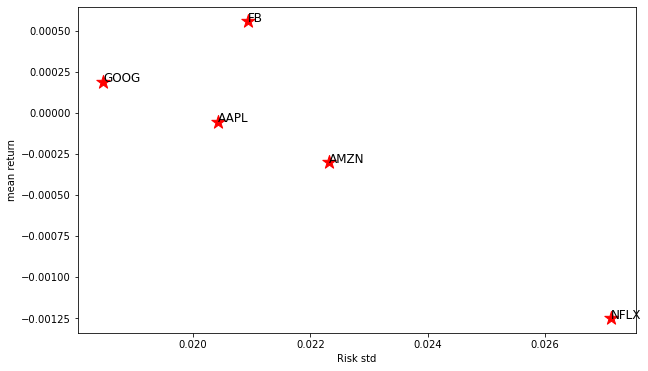

In [30]:
return_col = ['FB.1','GOOG.1','NFLX.1','AMZN.1','AAPL.1']
plt.figure(figsize=(10, 6))
plt.scatter(std, mean, color='red', marker='*', s=200)
for i, stock in enumerate(mean.index):
    plt.text(std.iloc[i], mean.iloc[i], stock.split('.1')[0], fontsize = 12)
    
plt.xlabel('Risk std')
plt.ylabel('mean return')
plt.show()

## (c)Randomly selected weights so that each weight is nonnegative and sums up to one. Print the random weight, the mean and std of the portfolio.

In [31]:
num_stocks = len(mean)
random_weights = np.random.rand(num_stocks)
random_weights /= np.sum(random_weights)

portfolio_mean = np.dot(random_weights, mean)
portfolio_std = np.sqrt(np.dot(random_weights**2, std**2))

print("random weights:",random_weights)
print("portfolio mean return:",portfolio_mean)
print("portfolio std(risk):",portfolio_std)

random weights: [0.03655116 0.10053506 0.07475953 0.47090959 0.31724466]
portfolio mean return: -0.00021422623146967113
portfolio std(risk): 0.012669494941175544


## (d) Repeat(c) for 1000 times, and plot the mean and std for these artificial portfolios using blue points in the 2-dimensional plane in (b).

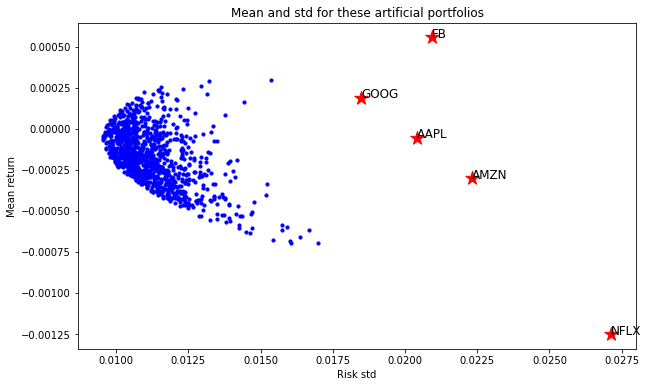

In [39]:
portfolio_means = []  # 用來存放所有投資組合的均值
portfolio_stds = []  # 用來存放所有投資組合的標準差

for _ in range(1000):
    random_weights = np.random.rand(len(mean))
    random_weights /= random_weights.sum()  # 確保權重總和為1
    
    # 計算投資組合的均值和標準差
    portfolio_mean = np.dot(random_weights, mean)
    portfolio_std = np.sqrt(np.dot(random_weights**2, std**2))
    
    # 將結果追加到列表中
    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

# 繪製散點圖
plt.figure(figsize=(10,6))
plt.scatter(portfolio_stds, portfolio_means, color='blue', marker='o', s=10)

# 標註每個股票的風險和回報
for i, stock in enumerate(mean.index):
    plt.text(std.iloc[i], mean.iloc[i], stock.split('.1')[0], fontsize=12)

plt.scatter(std, mean, color='red', marker='*', s=200)
plt.xlabel('Risk std')
plt.ylabel('Mean return')
plt.title('Mean and std for these artificial portfolios')
plt.show()


## (e) Draw the efficiency frontier in the figure of (b), assuming that no short sales are allowed.

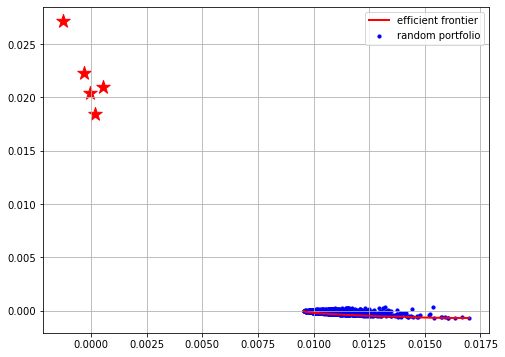

In [41]:
portfolio_means = np.array(portfolio_means)
portfolio_stds = np.array(portfolio_stds)
sorted_indices = np.argsort(portfolio_means)
sorted_means = portfolio_means[sorted_indices]
sorted_stds = portfolio_stds[sorted_indices]

efficient_frontier_means = []
efficient_frontier_stds = []

for i in range(len(sorted_means)):
    if i == 0 or sorted_stds[i] < min(efficient_frontier_stds):
        efficient_frontier_means.append(sorted_means[i])
        efficient_frontier_stds.append(sorted_stds[i])
        
plt.figure(figsize=(8, 6))
plt.scatter(mean, std, color = 'red', marker = '*', s=200)
plt.scatter(portfolio_stds, portfolio_means, color='blue', marker='o', s=10, label = 'random portfolio')
plt.plot(efficient_frontier_stds, efficient_frontier_means, color = 'red', linewidth = 2, label = 'efficient frontier')

plt.legend()
plt.grid(True)
plt.show()

## (f) Check if the efficency frontier in (e) is the envelop line of the blue points in (d).
Yes